<a href="https://colab.research.google.com/github/MrUmidjan90/Signature-Verification/blob/master/%D0%98%D0%B7%D0%B2%D0%BB%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка информативности признаков (моя копия файла:)

In [1]:
!ls

sample_data


In [2]:
import numpy as np
import pandas as pd 
import sklearn.feature_selection

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 20]

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# чтение файла с гугл-диска. не использую это, а читаю файл с диска на компе
#from google.colab import drive
#drive.mount('/content/drive')
#features_file = 'combined_features.csv'

In [4]:
from google.colab import files
upload = files.upload()
features_file = 'combined_features.csv'

Saving combined_features.csv to combined_features.csv


In [7]:
!ls

combined_features.csv  sample_data


In [8]:
features = pd.read_csv(features_file, sep='\t').set_index('File')

In [9]:
feature_names = features.columns

сформировать лейблы классов

In [10]:
labels = [file[0:3] for file in features.index]

Кодируем лейблы в числа от 0 до  n_classes-1 (не обязательно)

In [11]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

скорвертировать входные данные в матрицу чисел

In [12]:
X_indices = np.arange(features.shape[1])
X = features.to_numpy()
X = np.nan_to_num(X, posinf=0, neginf=0)

##  Оценка на основе ANOVA 

In [13]:
def print_selected_features(features_names, index_support, scores=None):
    best_k_features = feature_names[index_support]
    
    if scores is not None:
        best_k_scores = scores[index_support]
        best_k = pd.DataFrame(zip(best_k_features, best_k_scores), columns=['Признак','score']).sort_values(by='score', ascending=False)
    else:
        best_k = pd.DataFrame(best_k_features, columns=['Признак'])
    
    print(best_k)

## Оценка 10 лучших признаков

In [14]:
selector_kbest = SelectKBest()
selector_kbest.fit(X, labels)

SelectKBest()

<BarContainer object of 139 artists>

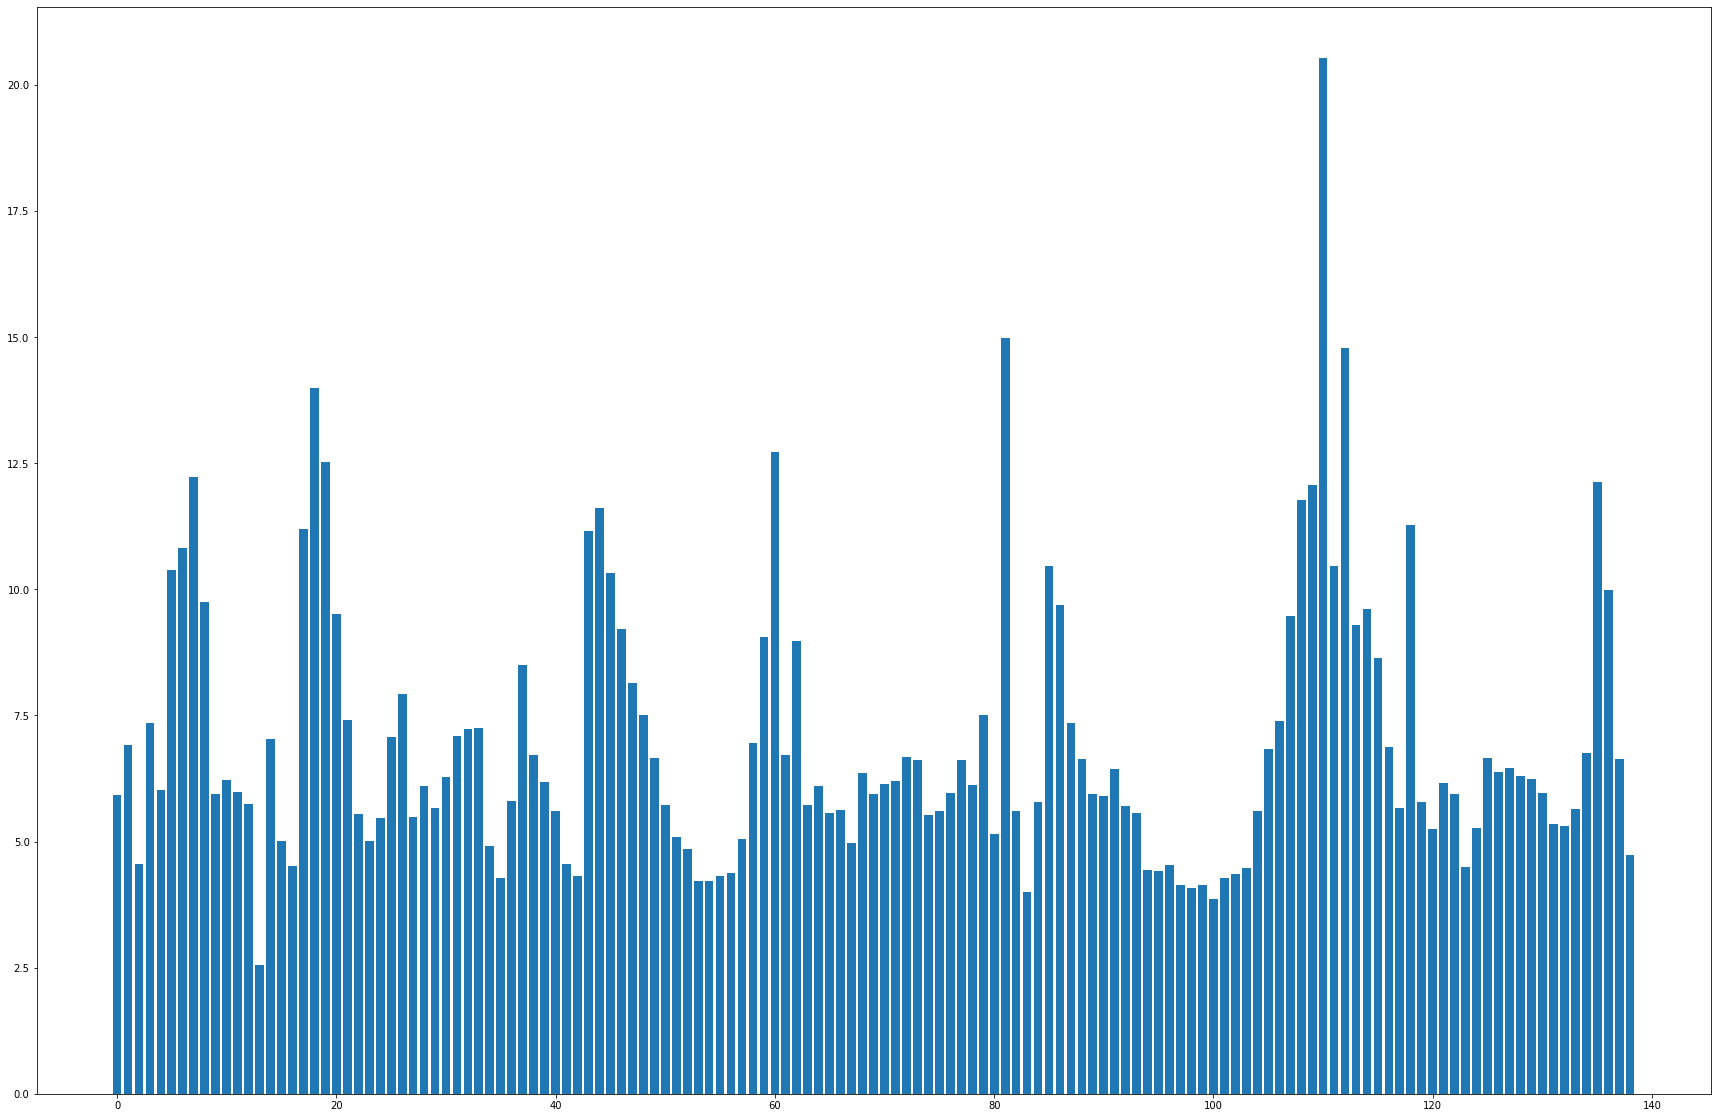

In [15]:
plt.bar(X_indices, selector_kbest.scores_)

### наиболее информативные признаки:

In [16]:
print_selected_features(feature_names, selector_kbest.get_support(),selector_kbest.scores_)

      Признак      score
7  lbp_r7_h29  20.522259
4   lbp_r7_h0  14.970581
8  lbp_r7_h31  14.784452
1   lbp_r3_h5  13.987007
3  lbp_r5_h21  12.717266
2   lbp_r3_h6  12.528294
0  SumEntropy  12.217235
9  lbp_r7_h54  12.120927
6  lbp_r7_h28  12.065493
5  lbp_r7_h27  11.759576


## Оценка 10 процентиля

In [17]:
from sklearn.feature_selection import SelectPercentile, chi2

selector_percent = SelectPercentile()
selector_percent.fit(X, labels)

SelectPercentile()

### наиболее информативные признаки:

In [18]:
print_selected_features(selector_percent, selector_percent.get_support(), selector_percent.scores_)

       Признак      score
10  lbp_r7_h29  20.522259
7    lbp_r7_h0  14.970581
11  lbp_r7_h31  14.784452
2    lbp_r3_h5  13.987007
6   lbp_r5_h21  12.717266
3    lbp_r3_h6  12.528294
0   SumEntropy  12.217235
13  lbp_r7_h54  12.120927
9   lbp_r7_h28  12.065493
8   lbp_r7_h27  11.759576
5    lbp_r5_h5  11.603908
12  lbp_r7_h37  11.279150
1    lbp_r3_h4  11.198363
4    lbp_r5_h4  11.163678


## Recursive feature elimination

In [19]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [20]:
svc = LinearSVC(C=0.01, dual=False)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1, verbose=1)
rfe.fit(X, labels)

Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
F

RFE(estimator=LinearSVC(C=0.01, dual=False), n_features_to_select=10, verbose=1)

In [21]:
rfe.ranking_

array([129,  69,   1,  71,   1,  23,  72,   1,   1, 130,   1,   1,   1,
         5,  14,  19,  30,  27, 102,  22,  18,  13,  11,   9,   8,   6,
         7,  10,  12,  17,  26,  31,  39, 119,  34, 112,  16,   2,   1,
        20,  25,  35,  66,  74, 127,  93,  50,  51,  53,  55,  57,  56,
        52,  54,  47,  43,  40,  36,  29,  24,  21,  33,  32,  37,  45,
        42,  44,  48,  59,  49,  61,  58,  62,  65,  76, 123, 125, 121,
       106,   3,   1,  15, 107,  63,  70, 116, 126, 109, 105,  94,  92,
        85,  95,  96, 104, 115, 111, 114, 113, 110, 103, 100,  97,  87,
        83,  78,  68,  64,  41,  38,  28,  60,  46,  67,  77,  81,  90,
        89,  88,  99, 117, 101, 118, 108,  98,  91,  86,  84,  80,  79,
        73,  75,  82, 120, 128, 124, 122,   4,   1])

### наиболее информативные признаки:

In [22]:
print_selected_features(feature_names, rfe.get_support())

              Признак
0         Correlation
1   InverseDiffMoment
2          SumEntropy
3             Entropy
4   DifferenceEntropy
5  MeasOfCorrelation1
6  MeasOfCorrelation2
7          lbp_r3_h25
8          lbp_r5_h41
9          lbp_r7_h57


## Оценка на основе модели LinearSVC

In [23]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [24]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, labels)
lsvc_model_selector = SelectFromModel(lsvc, prefit=True)

In [25]:
mean_svc_coefs = np.mean(lsvc.coef_, axis=0)

### наиболее информативные признаки:

In [26]:
print_selected_features(feature_names, lsvc_model_selector.get_support(), mean_svc_coefs)

       Признак     score
0     Contrast  0.000129
3  SumVariance  0.000014
1     Variance -0.000394
2   SumAverage -0.005690


## Оценка на основе модели ExtraTrees 

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
extra_trees = ExtraTreesClassifier(n_estimators=1000)
extra_trees = extra_trees.fit(X, labels)
extra_trees_selector = SelectFromModel(extra_trees, prefit=True)

### наиболее информативные признаки:

In [29]:
print_selected_features(feature_names, extra_trees_selector.get_support(), extra_trees.feature_importances_)

               Признак     score
42          lbp_r7_h56  0.021857
41          lbp_r7_h55  0.019400
28          lbp_r5_h37  0.017804
17          lbp_r3_h21  0.017205
1             Contrast  0.017103
9    DifferenceEntropy  0.016473
30          lbp_r5_h40  0.015950
39          lbp_r7_h53  0.015158
16          lbp_r3_h20  0.014161
8              Entropy  0.013303
6          SumVariance  0.012798
36          lbp_r7_h29  0.011801
19          lbp_r3_h24  0.011717
29          lbp_r5_h39  0.011706
14           lbp_r3_h4  0.011381
13           lbp_r3_h3  0.011155
7           SumEntropy  0.011093
5           SumAverage  0.011055
40          lbp_r7_h54  0.011052
3             Variance  0.010979
12           lbp_r3_h2  0.010158
31           lbp_r7_h0  0.009676
27          lbp_r5_h36  0.009593
2          Correlation  0.009567
4    InverseDiffMoment  0.009555
18          lbp_r3_h23  0.009434
37          lbp_r7_h31  0.009174
38          lbp_r7_h52  0.008580
15           lbp_r3_h5  0.008438
10  MeasOf

<BarContainer object of 139 artists>

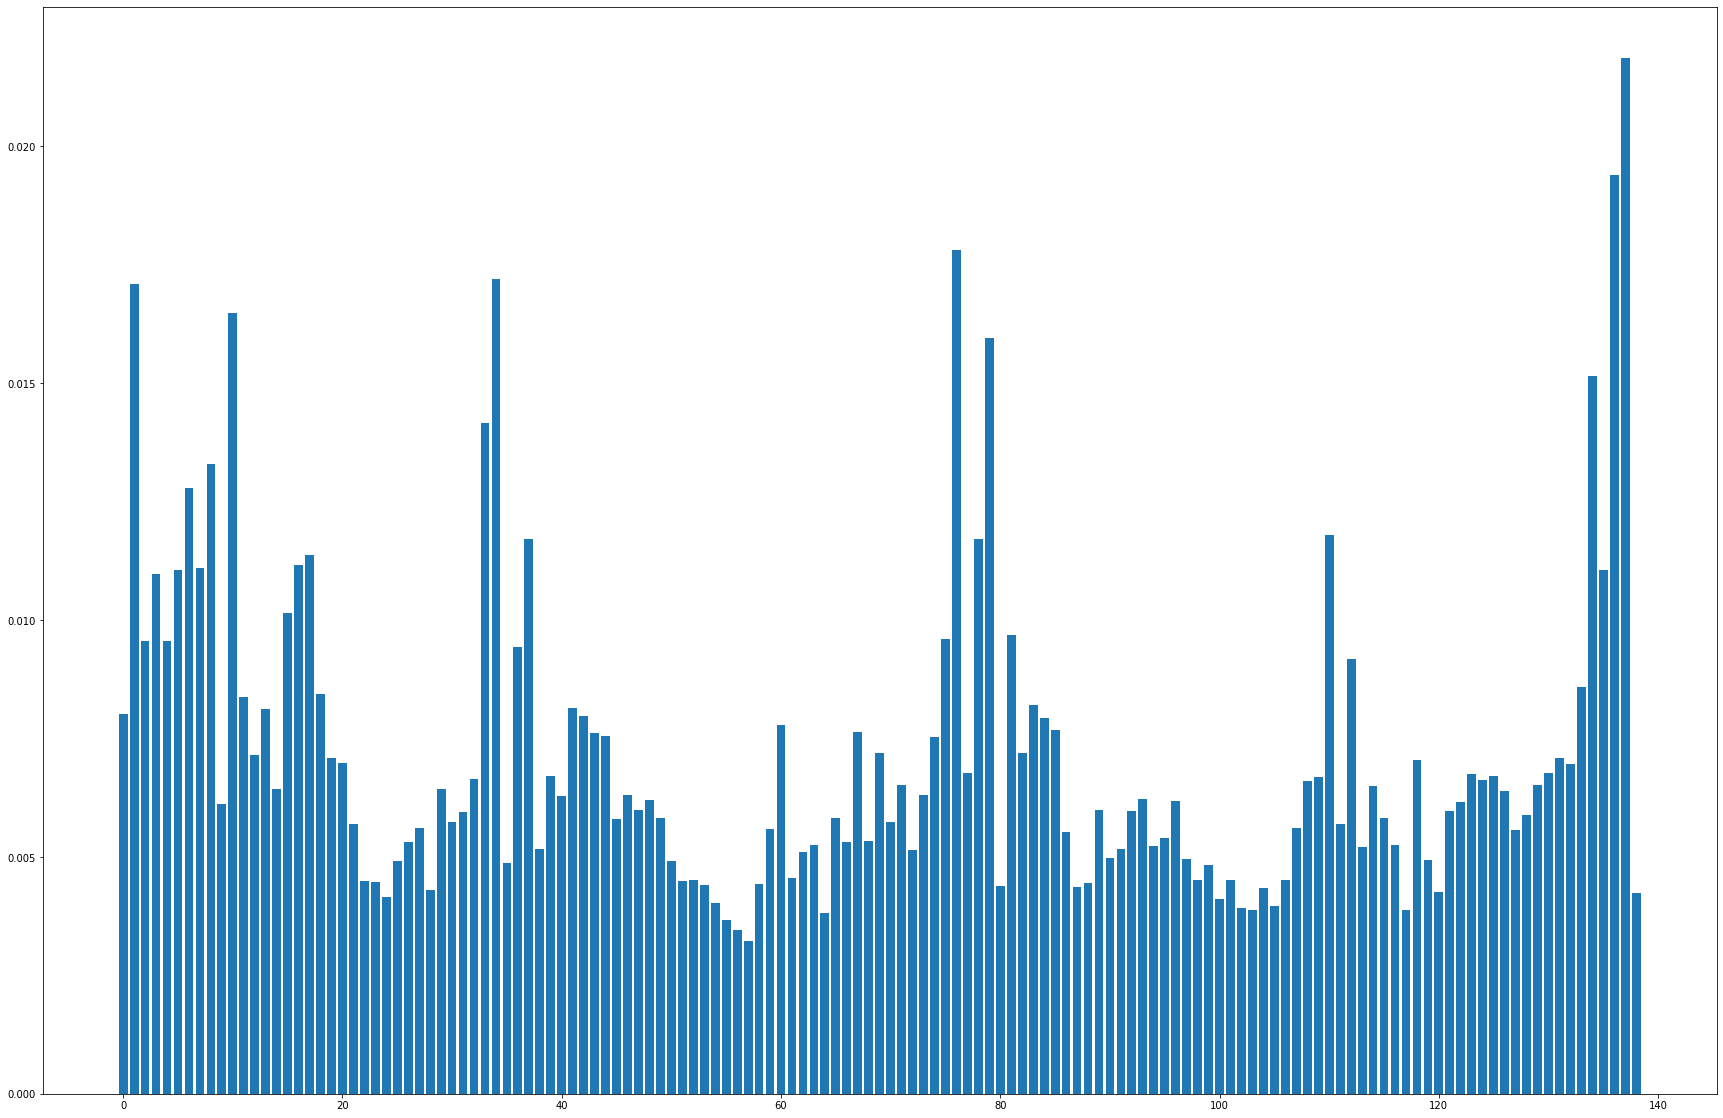

In [30]:
plt.bar(X_indices, extra_trees.feature_importances_)

## Оценка на основе модели RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X, labels)
forest_selector = SelectFromModel(forest, prefit=True)

### наиболее информативные признаки:

In [33]:
print_selected_features(feature_names, forest_selector.get_support(), forest.feature_importances_)

               Признак     score
40          lbp_r7_h56  0.040151
26          lbp_r5_h37  0.039080
18          lbp_r3_h21  0.035209
37          lbp_r7_h53  0.026054
28          lbp_r5_h40  0.023375
17          lbp_r3_h20  0.020274
19          lbp_r3_h24  0.018582
15           lbp_r3_h5  0.017543
39          lbp_r7_h55  0.017465
34          lbp_r7_h29  0.015917
29           lbp_r7_h0  0.015466
3             Variance  0.014382
9    DifferenceEntropy  0.013910
38          lbp_r7_h54  0.013762
13           lbp_r3_h3  0.013710
8              Entropy  0.013506
1             Contrast  0.012796
7           SumEntropy  0.012760
22           lbp_r5_h4  0.012327
14           lbp_r3_h4  0.012228
5           SumAverage  0.011456
12           lbp_r3_h2  0.010963
31           lbp_r7_h3  0.010781
35          lbp_r7_h31  0.010259
23           lbp_r5_h5  0.010079
0                  ASM  0.010022
21           lbp_r5_h3  0.009236
36          lbp_r7_h37  0.009060
6          SumVariance  0.009036
4    Inver

<BarContainer object of 139 artists>

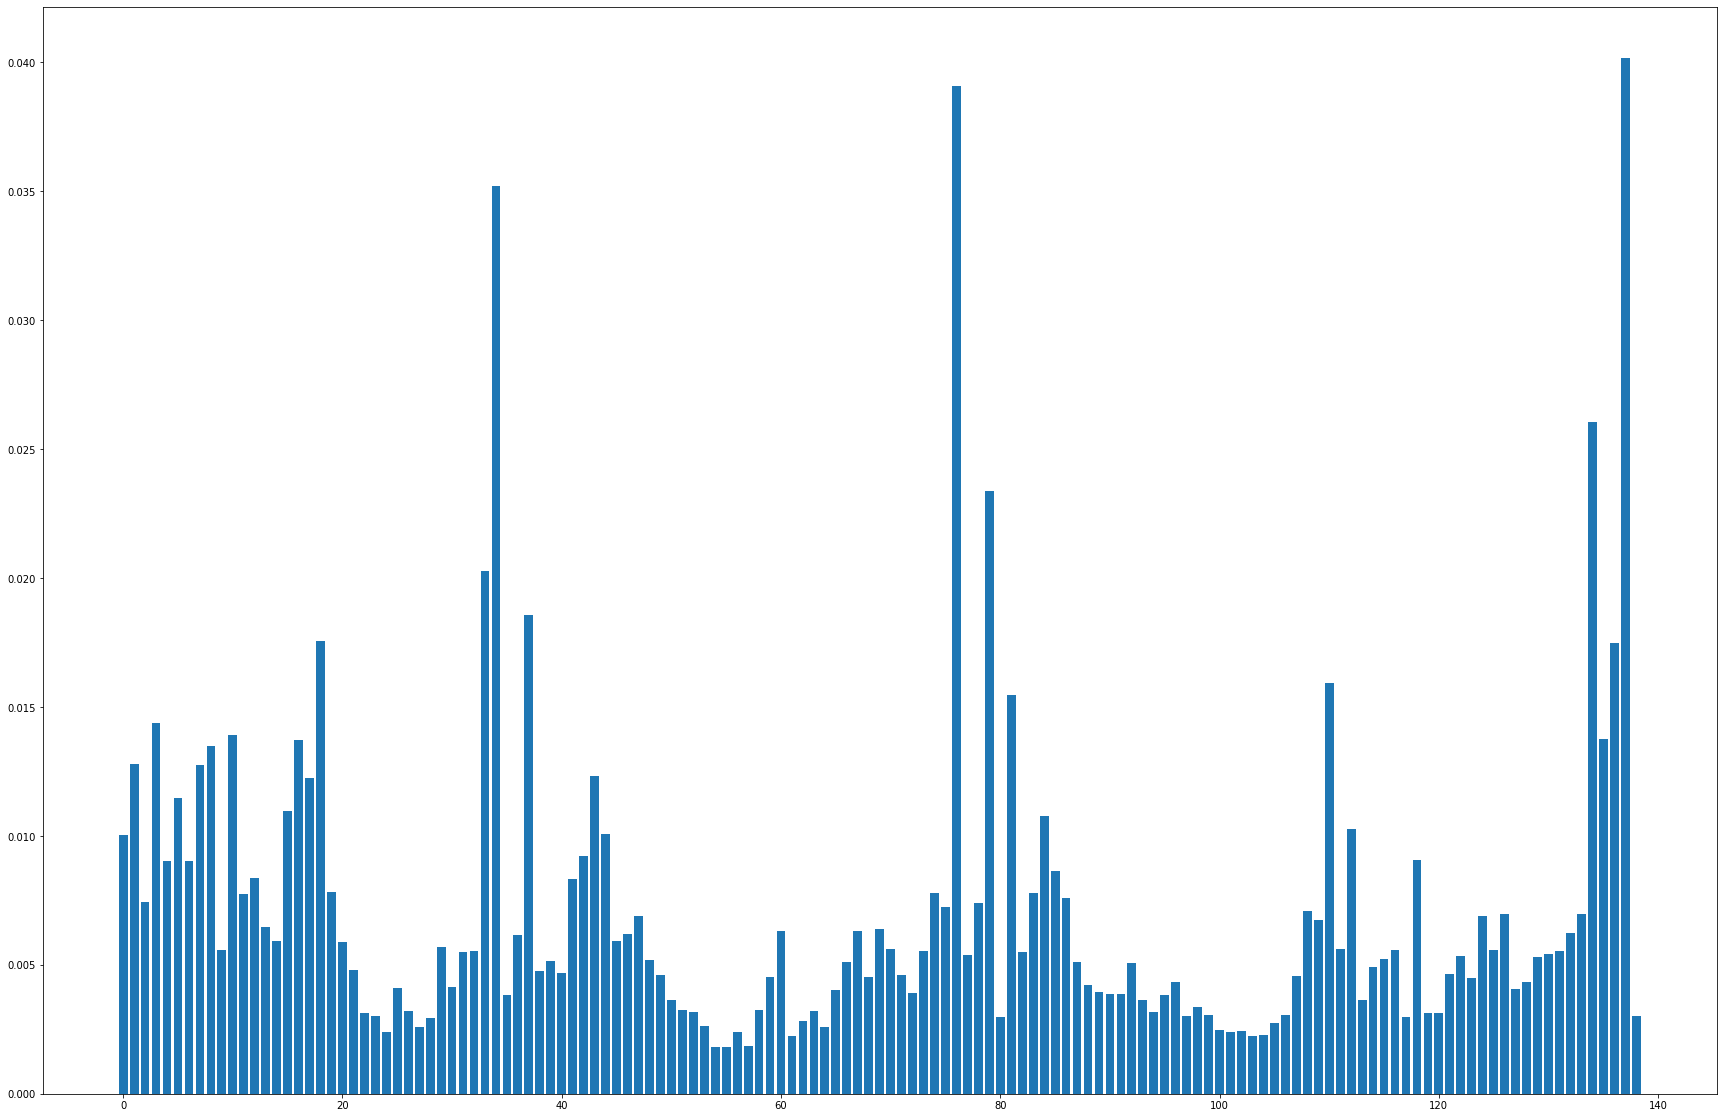

In [34]:
plt.bar(X_indices, forest.feature_importances_)

## Комбинированный график

In [35]:
forest_vals = forest.feature_importances_ / np.max(forest.feature_importances_)
extra_trees_val = extra_trees.feature_importances_ / np.max(extra_trees.feature_importances_)
anova_val = selector_kbest.scores_ / np.max(selector_kbest.scores_)
svm_val = np.abs(mean_svc_coefs)
svm_val = svm_val / np.max(svm_val)

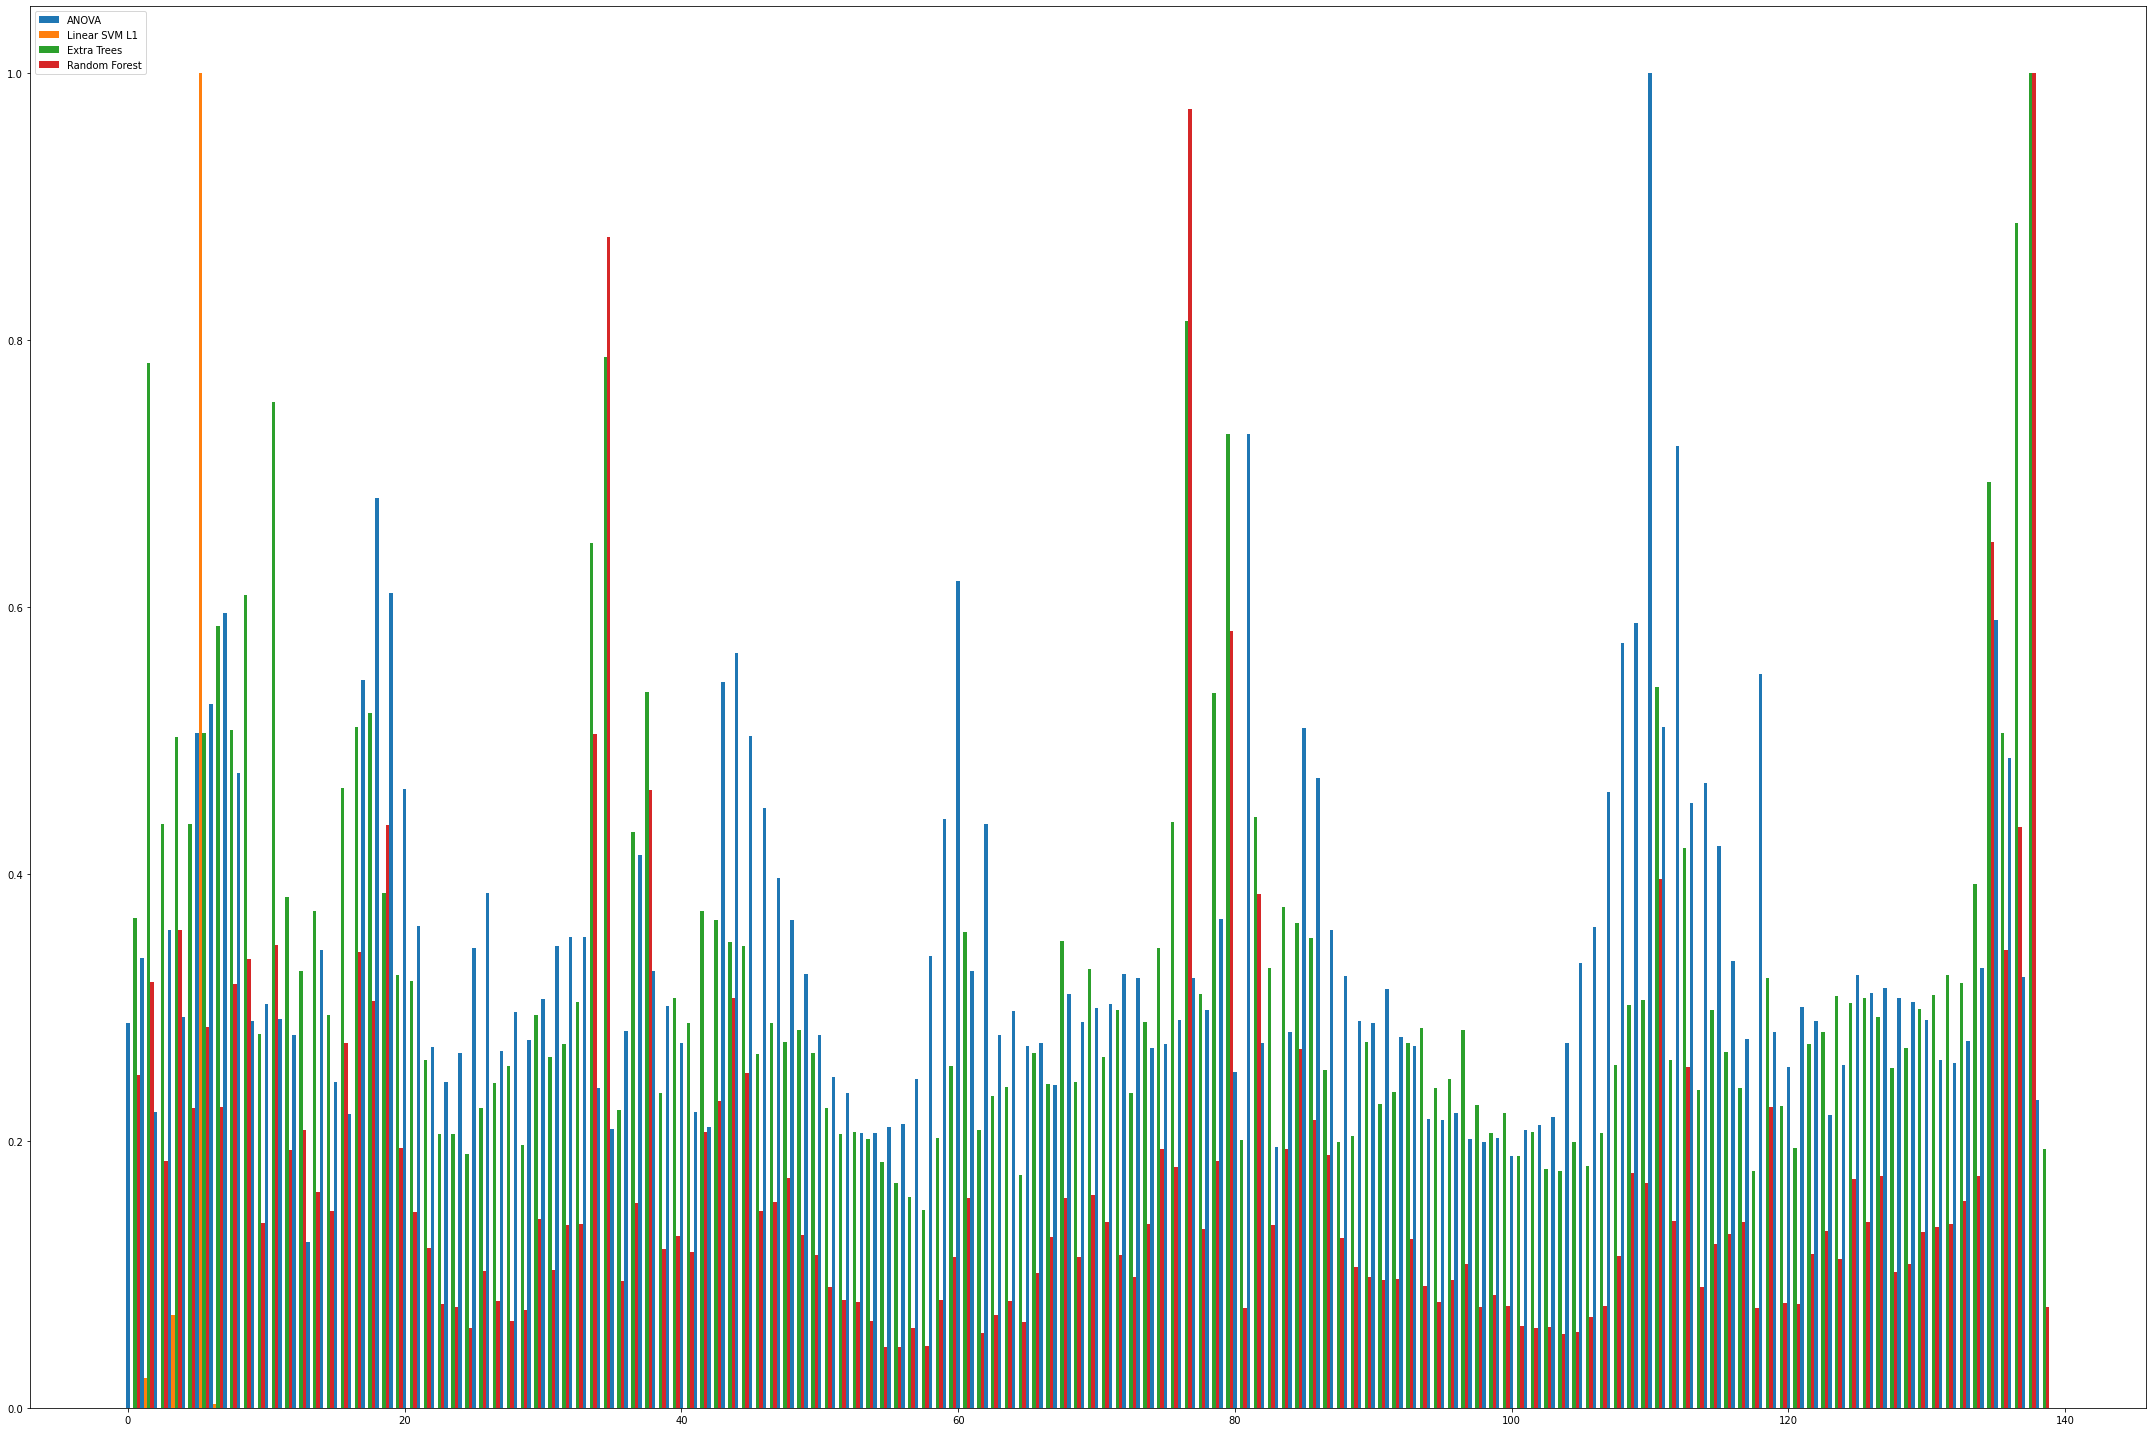

In [36]:
bar_width = 0.25

plt.bar(X_indices, anova_val, bar_width, label='ANOVA')
plt.bar(X_indices + bar_width, svm_val, bar_width, label='Linear SVM L1')
plt.bar(X_indices + bar_width*2, extra_trees_val, bar_width, label='Extra Trees')
plt.bar(X_indices + bar_width*3, forest_vals, bar_width, label='Random Forest')

plt.legend()
plt.tight_layout()
plt.show()
